In [ ]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, roc_auc_score, log_loss, precision_recall_curve

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


Step 1: 
Cleaning and Exlopring the data

In [3]:
df = pd.read_csv("C:\\Users\\apoor\\Downloads\\train.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The data has no null values

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The data does not seem to have any outliers or strange values in it

In [8]:
for col in cat_cols:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

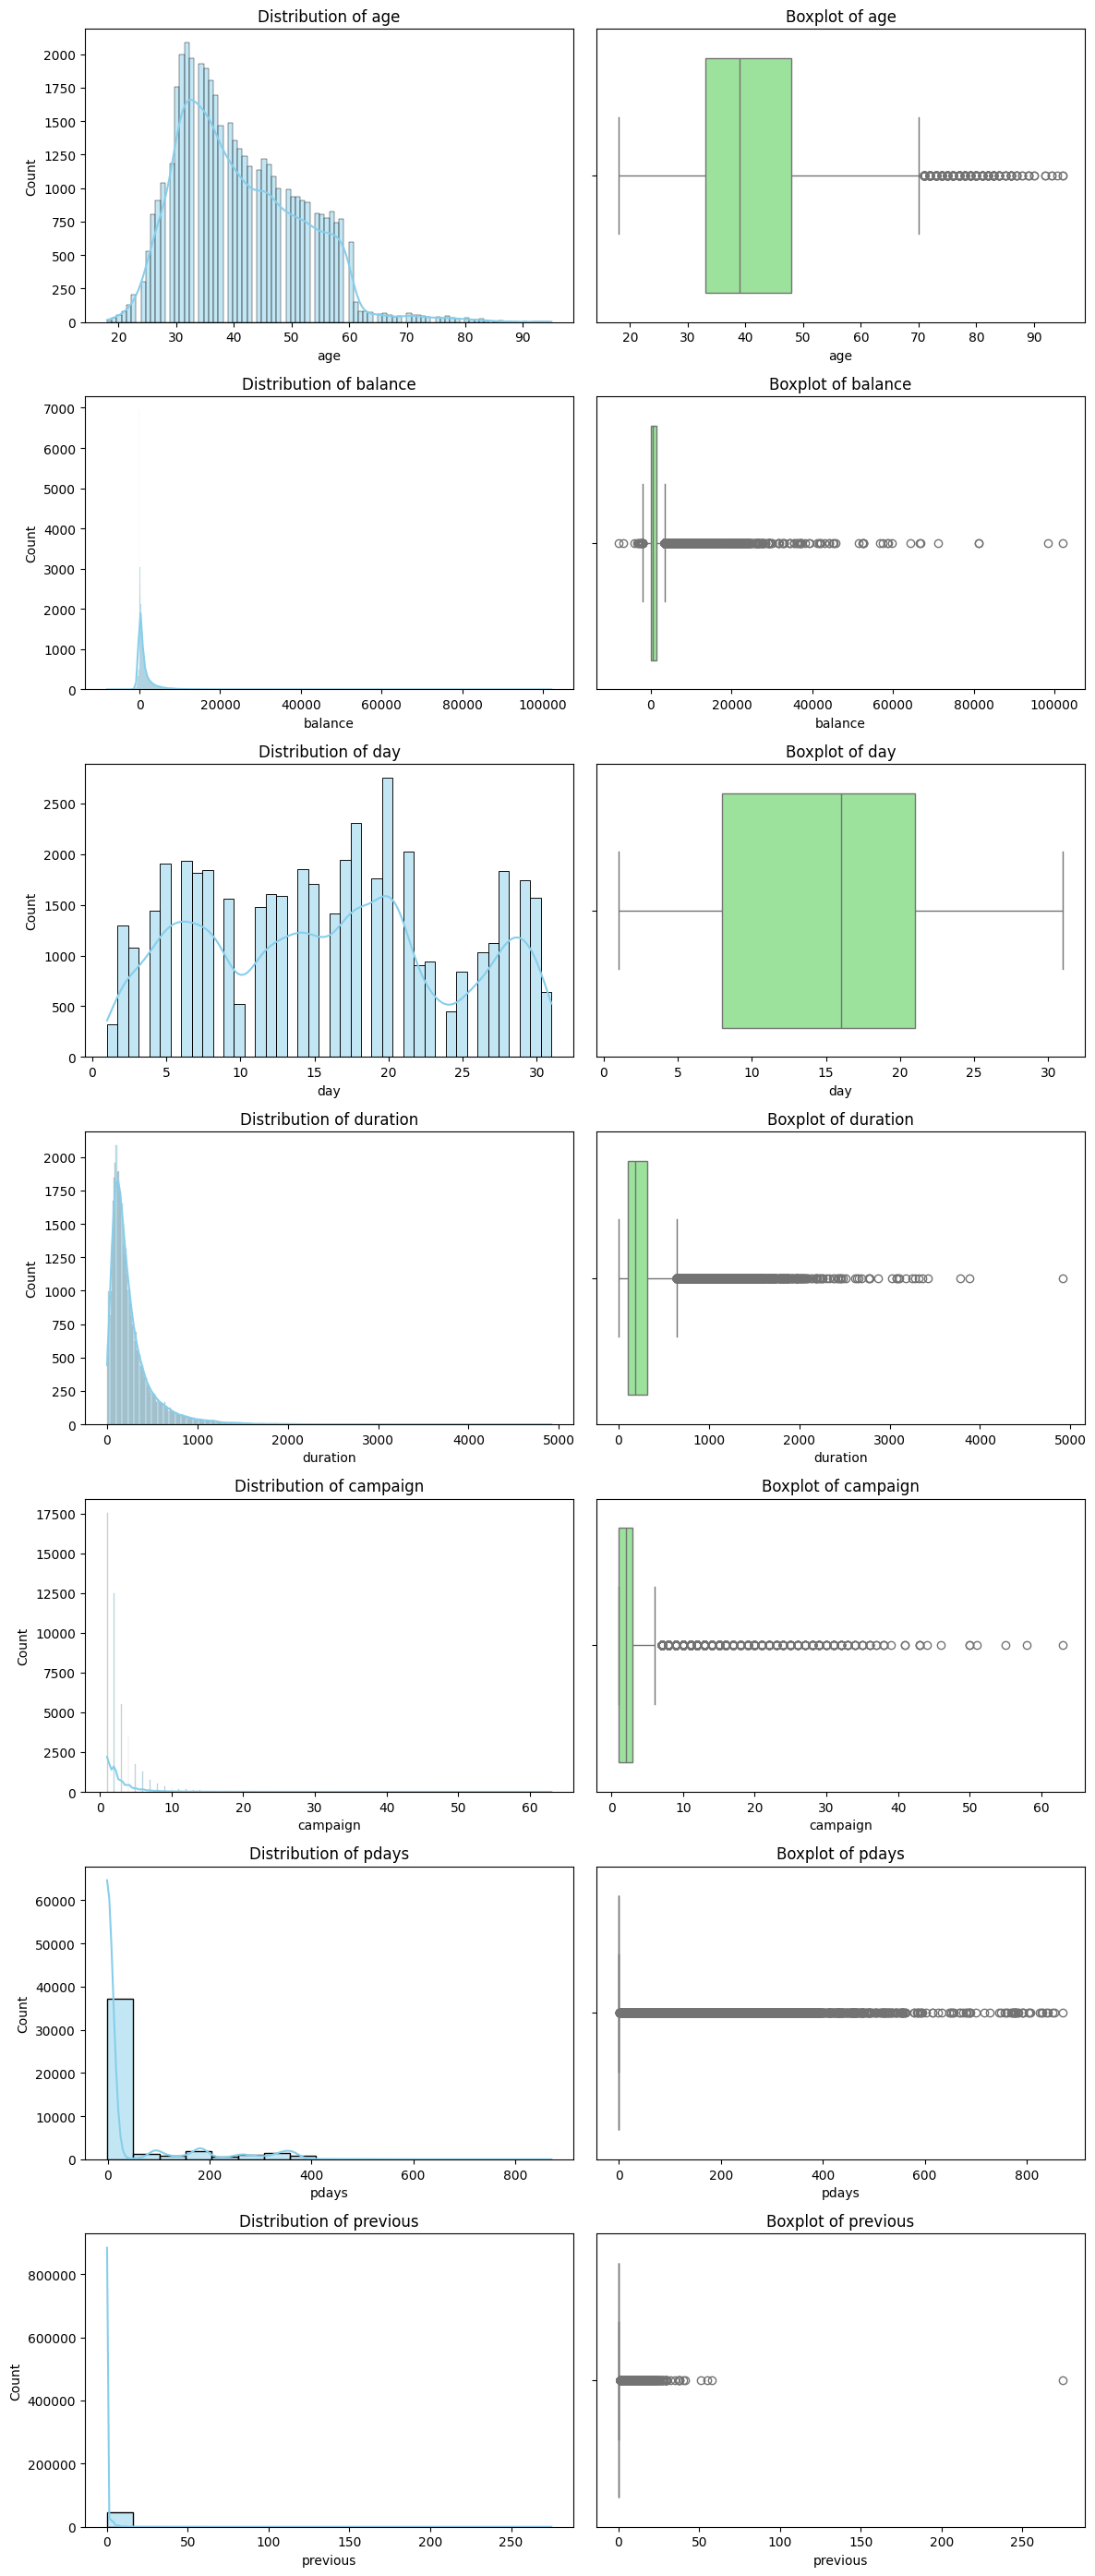

In [11]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 4*len(num_cols)))

for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i,0], color="skyblue")
    axes[i,0].set_title(f"Distribution of {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i,1], color="lightgreen")
    axes[i,1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Age: left skewed with more people in the 30-40 age group which makes sense as these people will also be the ones likely to get term insurnace.

Duration: left skewed, makes sense since calls are likely to be of short duration.

Campaign: most values 1, makes sense as it is the number of contacts performed before this campaign and for this client

C:\Users\apoor\AppData\Local\Temp\ipykernel_20932\3389011481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index,
C:\Users\apoor\AppData\Local\Temp\ipykernel_20932\3389011481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index,
C:\Users\apoor\AppData\Local\Temp\ipykernel_20932\3389011481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index,
C:\Users\apoor\AppData\Local\Temp\ipykernel_20932\3389011481.

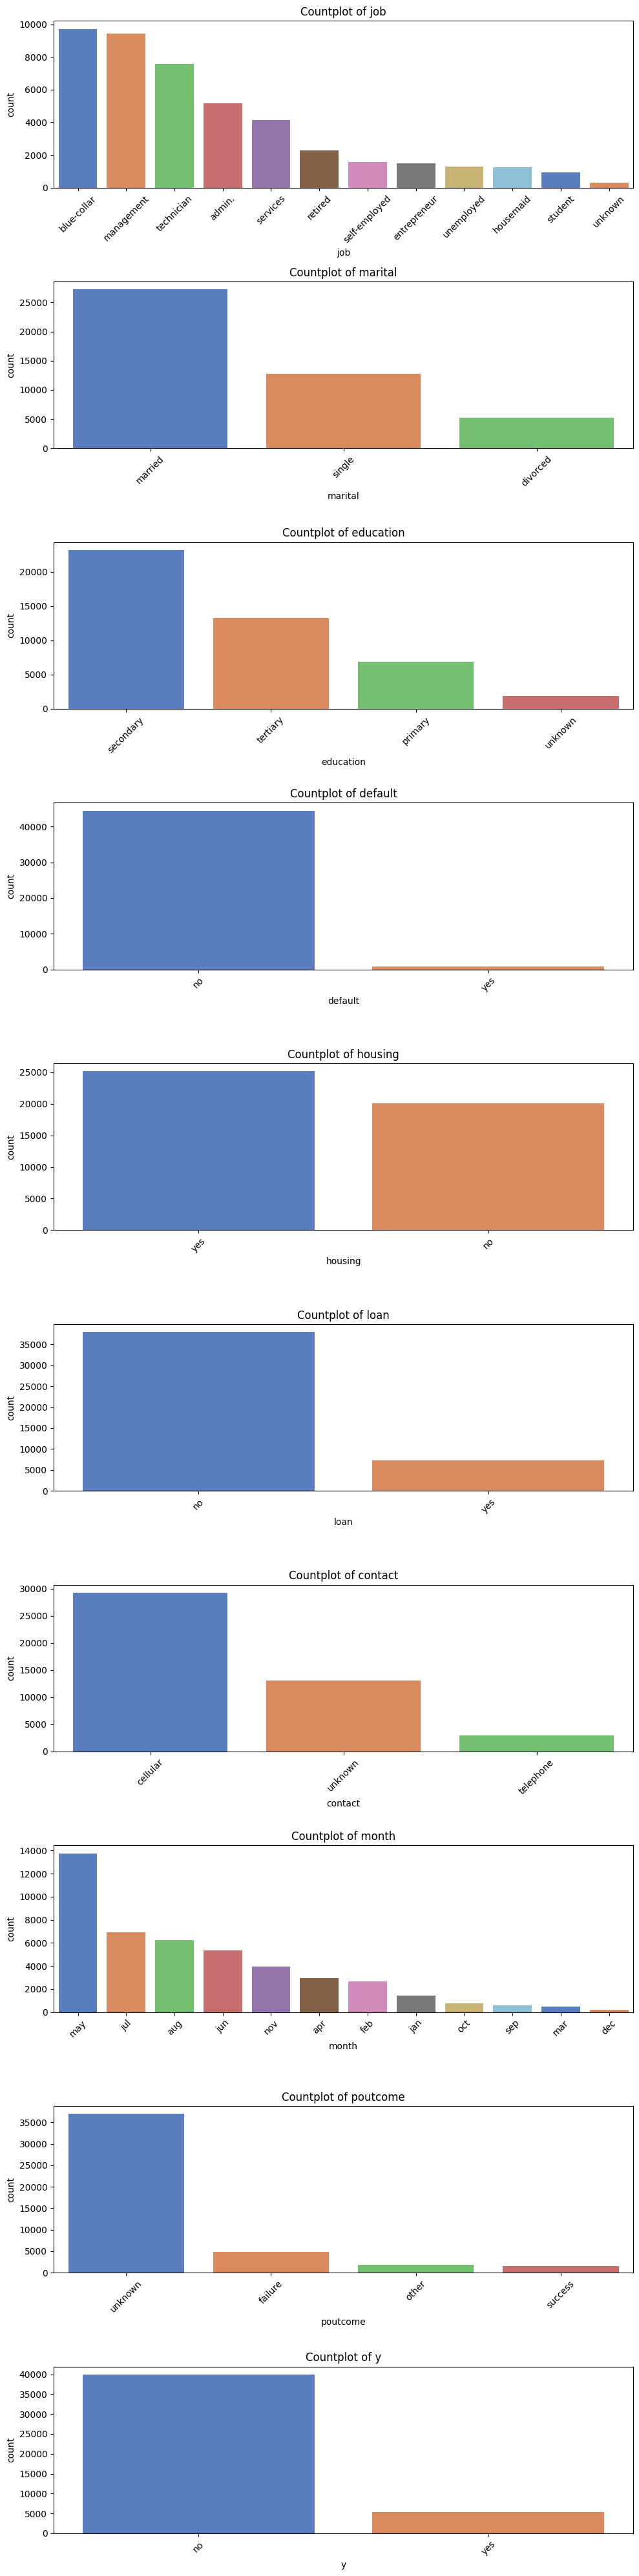

In [12]:
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 4*len(cat_cols)))

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], order=df[col].value_counts().index,
                  ax=axes[i], palette="muted")
    axes[i].set_title(f"Countplot of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Default: Most people in our dataset do no have default. 

Loan: Most people in our dataset have not taken a personal loan.

y: Most people in our dataset have not subscribed to a term deposit. Unbalanced dataset.

Pre-processing and Datapipeline


In [ ]:
X = df.drop('y', axis=1)
y = df['y'].map({'yes':1, 'no':0})   

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())     
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols[:-1]) 
    ]
)

Step 2: Baseline Model

1.0 Logistic Regression

In [ ]:
base_log = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

base_log.fit(X_train, y_train)

y_pred_log = base_log.predict(X_test)
y_proba_log = base_log.predict_proba(X_test)[:, 1]

print("=== Baseline Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))
print("Log Loss:", log_loss(y_test, y_proba_log))


=== Baseline Logistic Regression ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

ROC-AUC: 0.9055740146044154
Log Loss: 0.24095621487175628


1.1 Tuning the Model

In [ ]:
base_log = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

base_log.fit(X_train, y_train)

y_pred_log = base_log.predict(X_test)
y_proba_log = base_log.predict_proba(X_test)[:, 1]

print("=== Baseline Logistic Regression with class weights===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))
print("Log Loss:", log_loss(y_test, y_proba_log))


=== Baseline Logistic Regression with class weights===
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.85      0.86      9043

ROC-AUC: 0.9081509162382682
Log Loss: 0.4207796551985251


In [ ]:
over_sampler = RandomOverSampler(random_state=42)

log_over = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('oversample', over_sampler),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

log_over.fit(X_train, y_train)

y_pred_over = log_over.predict(X_test)
y_proba_over = log_over.predict_proba(X_test)[:,1]

print("=== Logistic Regression with Oversampling ===")
print(classification_report(y_test, y_pred_over))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_over))
print("Log Loss:", log_loss(y_test, y_proba_over))

=== Logistic Regression with Oversampling ===
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.82      0.55      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.84      0.86      9043

ROC-AUC: 0.9077208802421364
Log Loss: 0.42208450113718315


In [ ]:
smote = SMOTE(random_state=42)

log_smote = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', smote),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

log_smote.fit(X_train, y_train)

y_pred_smote = log_smote.predict(X_test)
y_proba_smote = log_smote.predict_proba(X_test)[:,1]

print("\n=== Logistic Regression with SMOTE ===")
print(classification_report(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))
print("Log Loss:", log_loss(y_test, y_proba_smote))


=== Logistic Regression with SMOTE ===
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.80      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043

ROC-AUC: 0.9065593214119575
Log Loss: 0.4146677083697602


In [23]:
df_grouped = df
df_grouped['poutcome_grouped'] = df_grouped['poutcome'].replace({'unknown':'other', 'failure':'other'})
import numpy as np

df_grouped['balance_log'] = np.log1p(df_grouped['balance'].clip(lower=0))        
df_grouped['duration_log'] = np.log1p(df_grouped['duration'])
df_grouped['campaign_log'] = np.log1p(df_grouped['campaign'])
df_grouped['contacted_before'] = (df_grouped['pdays'] != -1).astype(int)

num_cols1 = ['age','balance_log','duration_log','campaign_log']
cat_cols1 = ['job','marital','education','default','housing','loan','contact','month','poutcome_grouped','contacted_before','y']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


X = df_grouped.drop('y', axis=1)
y = df_grouped['y'].map({'yes':1, 'no':0})   

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

log_smote = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', smote),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

log_smote.fit(X_train, y_train)

y_pred_smote = log_smote.predict(X_test)
y_proba_smote = log_smote.predict_proba(X_test)[:,1]

print("\n=== Logistic Regression with SMOTE ===")
print(classification_report(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))
print("Log Loss:", log_loss(y_test, y_proba_smote))



=== Logistic Regression with SMOTE ===
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7985
           1       0.39      0.84      0.53      1058

    accuracy                           0.83      9043
   macro avg       0.68      0.83      0.71      9043
weighted avg       0.91      0.83      0.85      9043

ROC-AUC: 0.9057160578731623
Log Loss: 0.3973609462900593


Since there was a class imbalance in our dataset adding the weighted class should improve performance and it did. However many continous varaibles in our dataset are skewed and do not follow the assumptions of a regression model. Linear models also fail to capture non linear interactions and all of this explains the low performance of this model that we see.

2.0 KNN Base Model

In [ ]:
knn_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),        
    ('scaler', StandardScaler()),          
    ('knn', KNeighborsClassifier())
])

knn_pipe.fit(X_train, y_train)

y_pred_knn = knn_pipe.predict(X_test)
y_proba_knn = knn_pipe.predict_proba(X_test)[:,1]

print("=== KNN Classifier ===")
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_knn))
print("Log Loss:", log_loss(y_test, y_proba_knn))


=== KNN Classifier ===
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.58      0.29      0.39      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0.87      0.89      0.88      9043

ROC-AUC: 0.8020700439032071
Log Loss: 1.3104663516176471


2.0 Tuning the KNN Model

In [ ]:
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn_pipe, knn_params, scoring='precision', cv=5, n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Best KNN params:", grid_knn.best_params_)


Best KNN params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}


In [ ]:
best_knn = KNeighborsClassifier(
    n_neighbors=11,
    weights='uniform',
    metric='manhattan'
)

knn_pipe_final = Pipeline(steps=[
    ('preprocess', preprocessor),   
    ('knn', best_knn)
])

knn_pipe_final.fit(X_train, y_train)

y_pred_knn = knn_pipe_final.predict(X_test)
y_proba_knn = knn_pipe_final.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score, log_loss

print("=== Final KNN Model ===")
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_knn))
print("Log Loss:", log_loss(y_test, y_proba_knn))


=== Final KNN Model ===
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.66      0.26      0.37      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.62      0.66      9043
weighted avg       0.88      0.90      0.88      9043

ROC-AUC: 0.8617590520032243
Log Loss: 0.7238658701082488


In [ ]:
knn_over_dist = ImbPipeline(steps=[
    ('preprocess', preprocessor),      
    ('oversample', RandomOverSampler(random_state=42)),
    ('knn', KNeighborsClassifier(
        n_neighbors=11, 
        weights='uniform',  
        metric='manhattan'
    ))
])

knn_over_dist.fit(X_train, y_train)

y_pred_over_dist = knn_over_dist.predict(X_test)
y_proba_over_dist = knn_over_dist.predict_proba(X_test)[:,1]

print("=== KNN + Oversampling + Distance Weighting ===")
print(classification_report(y_test, y_pred_over_dist))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_over_dist))
print("Log Loss:", log_loss(y_test, y_proba_over_dist))


=== KNN + Oversampling + Distance Weighting ===
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      7985
           1       0.38      0.77      0.51      1058

    accuracy                           0.83      9043
   macro avg       0.67      0.80      0.70      9043
weighted avg       0.90      0.83      0.85      9043

ROC-AUC: 0.851271464809372
Log Loss: 1.5022124250620523


In [29]:
knn_smote_dist = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(
        n_neighbors=11, 
        weights='uniform',  
        metric='manhattan'
    ))
])

knn_smote_dist.fit(X_train, y_train)

y_pred_smote_dist = knn_smote_dist.predict(X_test)
y_proba_smote_dist = knn_smote_dist.predict_proba(X_test)[:,1]

print("=== KNN + SMOTE + Distance Weighting ===")
print(classification_report(y_test, y_pred_smote_dist))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote_dist))
print("Log Loss:", log_loss(y_test, y_proba_smote_dist))


=== KNN + SMOTE + Distance Weighting ===
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      7985
           1       0.44      0.68      0.53      1058

    accuracy                           0.86      9043
   macro avg       0.70      0.78      0.73      9043
weighted avg       0.89      0.86      0.87      9043

ROC-AUC: 0.8630286820870419
Log Loss: 1.161641204408867


In [30]:
df_grouped = df
df_grouped['poutcome_grouped'] = df_grouped['poutcome'].replace({'unknown':'other', 'failure':'other'})
import numpy as np

df_grouped['contacted_before'] = (df_grouped['pdays'] != -1).astype(int)

num_cols1 = ['age','balance','day','duration','campaign','previous']
cat_cols1 = ['job','marital','education','default','housing','loan','contact','month','poutcome_grouped','contacted_before','y']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols1),
        ('cat', categorical_transformer, cat_cols1[:-1]) 
    ]
)

X = df_grouped.drop('y', axis=1)
y = df_grouped['y'].map({'yes':1, 'no':0})   

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


knn_smote_dist = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(
        n_neighbors=11, 
        weights='uniform',  
        metric='manhattan'
    ))
])

knn_smote_dist.fit(X_train, y_train)

y_pred_smote_dist = knn_smote_dist.predict(X_test)
y_proba_smote_dist = knn_smote_dist.predict_proba(X_test)[:,1]

print("=== KNN + SMOTE + Distance Weighting ===")
print(classification_report(y_test, y_pred_smote_dist))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote_dist))
print("Log Loss:", log_loss(y_test, y_proba_smote_dist))


=== KNN + SMOTE + Distance Weighting ===
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      7985
           1       0.44      0.68      0.53      1058

    accuracy                           0.86      9043
   macro avg       0.70      0.78      0.72      9043
weighted avg       0.89      0.86      0.87      9043

ROC-AUC: 0.8637021447349889
Log Loss: 1.1438986827507798


Step 3: Ensemble Models

3.1 Random Forest

In [ ]:
rf_basic = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))  
])

rf_basic.fit(X_train, y_train)

y_pred_rf = rf_basic.predict(X_test)
y_proba_rf = rf_basic.predict_proba(X_test)[:, 1]

print("=== Basic Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("Log Loss:", log_loss(y_test, y_proba_rf))

=== Basic Random Forest ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.38      0.48      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043

ROC-AUC: 0.9265100679085194
Log Loss: 0.22481047054726372


In [ ]:
rf_params = {
    'rf__n_estimators': [100, 300],         
    'rf__max_depth': [None, 10, 20],        
    'rf__min_samples_split': [2, 5, 10],         
    'rf__min_samples_leaf': [1, 2, 4],          
    'rf__bootstrap': [True, False]            
}

rf_grid = GridSearchCV(
    estimator=rf_basic,
    param_grid=rf_params,
    scoring='precision',              
    cv=5,
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Best CV Score (F1):", rf_grid.best_score_)

best_rf = rf_grid.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
y_proba_rf_tuned = best_rf.predict_proba(X_test)[:, 1]

print("\n=== Tuned Random Forest ===")
print(classification_report(y_test, y_pred_rf_tuned))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf_tuned))
print("Log Loss:", log_loss(y_test, y_proba_rf_tuned))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Random Forest Params: {'rf__bootstrap': True, 'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 300}
Best CV Score (F1): 0.7526867371669501

=== Tuned Random Forest ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.75      0.19      0.30      1058

    accuracy                           0.90      9043
   macro avg       0.83      0.59      0.62      9043
weighted avg       0.88      0.90      0.87      9043

ROC-AUC: 0.9222746335579589
Log Loss: 0.22529918210301708


In [ ]:
rf_over = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('oversample', RandomOverSampler(random_state=42)),
    ('rf', RandomForestClassifier(
        bootstrap=True,
        max_depth=10,
        min_samples_leaf=4,
        min_samples_split=2,
        n_estimators=100,
        random_state=42
    ))
])

rf_over.fit(X_train, y_train)

y_pred_over = rf_over.predict(X_test)
y_proba_over = rf_over.predict_proba(X_test)[:, 1]

print("=== Random Forest + Random OverSampling ===")
print(classification_report(y_test, y_pred_over))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_over))
print("Log Loss:", log_loss(y_test, y_proba_over))

=== Random Forest + Random OverSampling ===
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7985
           1       0.40      0.87      0.55      1058

    accuracy                           0.83      9043
   macro avg       0.69      0.85      0.72      9043
weighted avg       0.91      0.83      0.86      9043

ROC-AUC: 0.9195528477899841
Log Loss: 0.3857669372272312


In [ ]:
rf_smote = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(
        bootstrap=True,
        max_depth=10,
        min_samples_leaf=4,
        min_samples_split=2,
        n_estimators=100,
        random_state=42
    ))
])

rf_smote.fit(X_train, y_train)

y_pred_smote = rf_smote.predict(X_test)
y_proba_smote = rf_smote.predict_proba(X_test)[:, 1]

print("=== Random Forest + SMOTE ===")
print(classification_report(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))
print("Log Loss:", log_loss(y_test, y_proba_smote))

=== Random Forest + SMOTE ===
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7985
           1       0.44      0.80      0.57      1058

    accuracy                           0.86      9043
   macro avg       0.71      0.84      0.74      9043
weighted avg       0.91      0.86      0.88      9043

ROC-AUC: 0.9156515702291513
Log Loss: 0.33440988834927055


In [ ]:
rf_balanced = Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_leaf=4,
        min_samples_split=2,
        bootstrap=True,
        class_weight='balanced', 
        random_state=42
    ))
])

rf_balanced.fit(X_train, y_train)

y_pred_bal = rf_balanced.predict(X_test)
y_proba_bal = rf_balanced.predict_proba(X_test)[:,1]

print("=== Random Forest with class_weight='balanced' ===")
print(classification_report(y_test, y_pred_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_bal))
print("Log Loss:", log_loss(y_test, y_proba_bal))

=== Random Forest with class_weight='balanced' ===
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7985
           1       0.41      0.86      0.56      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.85      0.73      9043
weighted avg       0.91      0.84      0.86      9043

ROC-AUC: 0.9182076980349497
Log Loss: 0.3775991023760913


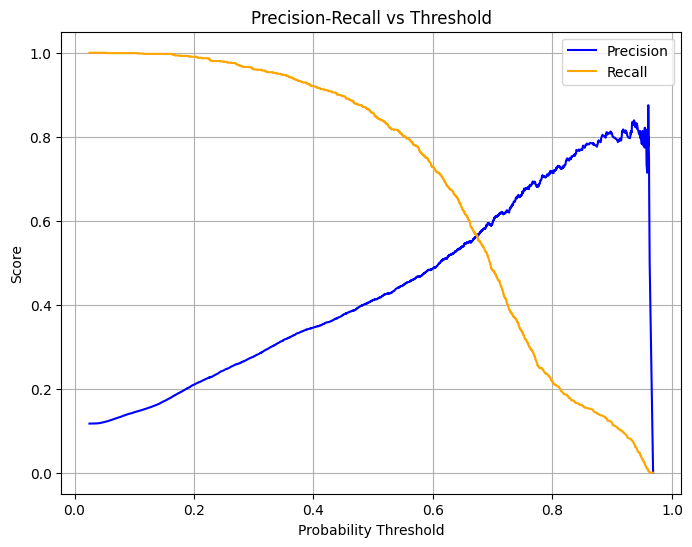

In [ ]:
y_proba = rf_balanced.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_proba = rf_balanced.predict_proba(X_test)[:,1]

chosen_threshold = 0.9
y_pred_high_prec = (y_proba >= chosen_threshold).astype(int)

from sklearn.metrics import classification_report, roc_auc_score, log_loss

print("=== Random Forest at Threshold 0.9 ===")
print(classification_report(y_test, y_pred_high_prec))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Log Loss:", log_loss(y_test, y_proba))

=== Random Forest at Threshold 0.9 ===
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7985
           1       0.80      0.12      0.20      1058

    accuracy                           0.89      9043
   macro avg       0.85      0.56      0.57      9043
weighted avg       0.88      0.89      0.86      9043

ROC-AUC: 0.9182076980349497
Log Loss: 0.3775991023760913


3.2 Adaboost

In [ ]:
ada_basic = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('ada', AdaBoostClassifier(random_state=42))
])

ada_basic.fit(X_train, y_train)

y_pred_ada = ada_basic.predict(X_test)
y_proba_ada = ada_basic.predict_proba(X_test)[:,1]

print("=== Basic AdaBoost ===")
print(classification_report(y_test, y_pred_ada))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_ada))
print("Log Loss:", log_loss(y_test, y_proba_ada))

=== Basic AdaBoost ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.61      0.34      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043

ROC-AUC: 0.899253325883953
Log Loss: 0.4746128443785808


In [ ]:
ada_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('ada', AdaBoostClassifier(random_state=42))
])

ada_params = {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'ada__estimator': [DecisionTreeClassifier(max_depth=1),
                            DecisionTreeClassifier(max_depth=2)]
}

grid_ada = GridSearchCV(ada_pipe, ada_params, 
                        scoring='precision',  # can change to 'precision' if needed
                        cv=5, n_jobs=-1)

grid_ada.fit(X_train, y_train)

print("Best AdaBoost Params:", grid_ada.best_params_)
print("Best CV Score (F1):", grid_ada.best_score_)

y_pred_ada_best = grid_ada.predict(X_test)
y_proba_ada_best = grid_ada.predict_proba(X_test)[:,1]

print("\n=== Tuned AdaBoost ===")
print(classification_report(y_test, y_pred_ada_best))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_ada_best))
print("Log Loss:", log_loss(y_test, y_proba_ada_best))


Best AdaBoost Params: {'ada__estimator': DecisionTreeClassifier(max_depth=1), 'ada__learning_rate': 0.1, 'ada__n_estimators': 100}
Best CV Score (F1): 0.8154637122078983

=== Tuned AdaBoost ===
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7985
           1       0.84      0.04      0.08      1058

    accuracy                           0.89      9043
   macro avg       0.86      0.52      0.51      9043
weighted avg       0.88      0.89      0.84      9043

ROC-AUC: 0.8751273358719622
Log Loss: 0.3604948332394438


In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = 100
learning_rate = 0.1

ada_over = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('oversample', RandomOverSampler(random_state=42)),
    ('ada', AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    ))
])

ada_over.fit(X_train, y_train)
y_pred_over = ada_over.predict(X_test)
y_proba_over = ada_over.predict_proba(X_test)[:,1]

print("=== AdaBoost + Oversampling ===")
print(classification_report(y_test, y_pred_over))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_over))
print("Log Loss:", log_loss(y_test, y_proba_over))

=== AdaBoost + Oversampling ===
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      7985
           1       0.36      0.76      0.49      1058

    accuracy                           0.81      9043
   macro avg       0.66      0.79      0.69      9043
weighted avg       0.89      0.81      0.84      9043

ROC-AUC: 0.8747751277501649
Log Loss: 0.4932014847090208


In [ ]:
ada_smote = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('ada', AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    ))
])

ada_smote.fit(X_train, y_train)
y_pred_smote = ada_smote.predict(X_test)
y_proba_smote = ada_smote.predict_proba(X_test)[:,1]

print("\n=== AdaBoost + SMOTE ===")
print(classification_report(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))
print("Log Loss:", log_loss(y_test, y_proba_smote))


=== AdaBoost + SMOTE ===
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      7985
           1       0.34      0.84      0.48      1058

    accuracy                           0.79      9043
   macro avg       0.66      0.81      0.67      9043
weighted avg       0.90      0.79      0.82      9043

ROC-AUC: 0.8845158632738842
Log Loss: 0.5083262424046725


In [ ]:
base_estimator_bal = DecisionTreeClassifier(max_depth=1, class_weight='balanced')

ada_bal = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('ada', AdaBoostClassifier(
        estimator=base_estimator_bal,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    ))
])

ada_bal.fit(X_train, y_train)
y_pred_bal = ada_bal.predict(X_test)
y_proba_bal = ada_bal.predict_proba(X_test)[:,1]

print("\n=== AdaBoost + Balanced Weight ===")
print(classification_report(y_test, y_pred_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_bal))
print("Log Loss:", log_loss(y_test, y_proba_bal))



=== AdaBoost + Balanced Weight ===
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      7985
           1       0.24      0.73      0.37      1058

    accuracy                           0.70      9043
   macro avg       0.60      0.71      0.59      9043
weighted avg       0.87      0.70      0.76      9043

ROC-AUC: 0.7784993838873218
Log Loss: 0.573222114923317


3.3 Bagging Classifier

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=5, random_state=42)

bag_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('bag', BaggingClassifier(
        estimator=base_estimator,
        n_estimators=100,      # number of trees
        random_state=42,
        n_jobs=-1
    ))
])

bag_pipe.fit(X_train, y_train)

y_pred_bag = bag_pipe.predict(X_test)
y_proba_bag = bag_pipe.predict_proba(X_test)[:,1]

print("=== Bagging Classifier ===")
print(classification_report(y_test, y_pred_bag))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_bag))
print("Log Loss:", log_loss(y_test, y_proba_bag))

=== Bagging Classifier ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.65      0.33      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043

ROC-AUC: 0.8761725375911591
Log Loss: 0.24470062057000655


In [ ]:
bag_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('bag', BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42,
        n_jobs=-1
    ))
])

bag_params = {
    'bag__n_estimators': [50, 100, 200],
    'bag__max_samples': [0.6, 0.8],
    'bag__max_features': [0.6, 0.8, 1.0],
    'bag__estimator__max_depth': [3, 5],
    'bag__estimator__min_samples_split': [2, 5]
}

grid_bag = GridSearchCV(
    bag_pipe, 
    param_grid=bag_params, 
    scoring='precision',  
    cv=5,
    n_jobs=-1
)

grid_bag.fit(X_train, y_train)

print("Best Bagging Params:", grid_bag.best_params_)
print("Best CV Score (F1):", grid_bag.best_score_)

y_pred_bag = grid_bag.predict(X_test)
y_proba_bag = grid_bag.predict_proba(X_test)[:,1]

Best Bagging Params: {'bag__estimator__max_depth': 5, 'bag__estimator__min_samples_split': 5, 'bag__max_features': 0.6, 'bag__max_samples': 0.6, 'bag__n_estimators': 50}
Best CV Score (F1): 0.7505147734793787


In [52]:
from sklearn.metrics import classification_report, roc_auc_score, log_loss
print("=== Bagging Classifier ===")
print(classification_report(y_test, y_pred_bag))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_bag))
print("Log Loss:", log_loss(y_test, y_proba_bag))

=== Bagging Classifier ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.75      0.17      0.28      1058

    accuracy                           0.90      9043
   macro avg       0.82      0.58      0.61      9043
weighted avg       0.88      0.90      0.87      9043

ROC-AUC: 0.9072221899994435
Log Loss: 0.24698825929837873


In [ ]:
smote = SMOTE(random_state=42)

bag_smote_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', smote),
    ('bag', BaggingClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=3,
            min_samples_split=2,
            random_state=42
        ),
        n_estimators=100,
        max_samples=0.6,
        max_features=0.6,
        random_state=42,
        n_jobs=-1
    ))
])

bag_smote_pipe.fit(X_train, y_train)

y_pred_smote = bag_smote_pipe.predict(X_test)
y_proba_smote = bag_smote_pipe.predict_proba(X_test)[:,1]

print("=== Bagging + SMOTE ===")
print(classification_report(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))
print("Log Loss:", log_loss(y_test, y_proba_smote))

=== Bagging + SMOTE ===
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      7985
           1       0.30      0.86      0.45      1058

    accuracy                           0.75      9043
   macro avg       0.64      0.80      0.64      9043
weighted avg       0.90      0.75      0.79      9043

ROC-AUC: 0.8843223293202165
Log Loss: 0.4646134972852


In [ ]:
bag_weight_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('bag', BaggingClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=3,
            min_samples_split=2,
            class_weight='balanced',
            random_state=42
        ),
        n_estimators=100,
        max_samples=0.6,
        max_features=0.6,
        random_state=42,
        n_jobs=-1
    ))
])

bag_weight_pipe.fit(X_train, y_train)

y_pred_weight = bag_weight_pipe.predict(X_test)
y_proba_weight = bag_weight_pipe.predict_proba(X_test)[:,1]

print("\n=== Bagging + Class Weight ===")
print(classification_report(y_test, y_pred_weight))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_weight))
print("Log Loss:", log_loss(y_test, y_proba_weight))



=== Bagging + Class Weight ===
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      7985
           1       0.31      0.81      0.45      1058

    accuracy                           0.77      9043
   macro avg       0.64      0.79      0.65      9043
weighted avg       0.89      0.77      0.80      9043

ROC-AUC: 0.8834938619552491
Log Loss: 0.4789448840383415


3.4 Voting Classifier

In [ ]:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42),
    n_estimators=100,
    max_samples=0.6,
    max_features=0.6,
    random_state=42,
    n_jobs=-1
)


ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=4,
    bootstrap=True,
    random_state=42,
    class_weight='balanced'
)

voting_clf = VotingClassifier(
    estimators=[
        ('bag', bag_model),
        ('ada', ada_model),
        ('rf', rf_model)
    ],
    voting='soft', 
    n_jobs=-1
)

voting_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('voting', voting_clf)
])

voting_pipe.fit(X_train, y_train)

y_pred_vote = voting_pipe.predict(X_test)
y_proba_vote = voting_pipe.predict_proba(X_test)[:,1]


print("=== Voting Classifier (Bagging + AdaBoost + RF) ===")
print(classification_report(y_test, y_pred_vote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_vote))
print("Log Loss:", log_loss(y_test, y_proba_vote))


=== Voting Classifier (Bagging + AdaBoost + RF) ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7985
           1       0.64      0.33      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.89      9043

ROC-AUC: 0.9133753860321752
Log Loss: 0.30687929419320764


In [ ]:
voting_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('voting', voting_clf)
])

param_grid = {
    'voting__weights': [
        [1, 1, 1],
        [2, 1, 1],
        [1, 2, 1],
        [1, 1, 2],
        [2, 2, 1],
        [2, 1, 2],
        [1, 2, 2],
        [3, 2, 1]
    ]
}

grid_vote = GridSearchCV(
    voting_pipe,
    param_grid=param_grid,
    scoring='precision',
    cv=5,
    n_jobs=-1
)

grid_vote.fit(X_train, y_train)


print("Best Voting Weights:", grid_vote.best_params_)
print("Best CV Precision:", grid_vote.best_score_)

y_proba_vote = grid_vote.predict_proba(X_test)[:,1]

threshold = 0.9
y_pred_vote = (y_proba_vote >= threshold).astype(int)

print("\n=== Voting Classifier Evaluation ===")
print(classification_report(y_test, y_pred_vote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_vote))
print("Log Loss:", log_loss(y_test, y_proba_vote))


Best Voting Weights: {'voting__weights': [3, 2, 1]}
Best CV Precision: 0.7227427487955665

=== Voting Classifier Evaluation ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7985
           1       0.00      0.00      0.00      1058

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043

ROC-AUC: 0.9069897125162607
Log Loss: 0.29209870203443056


c:\Users\apoor\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\apoor\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\apoor\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo